最小二乘法（least square method）就是基于均方误差最小化来进行模型求解的一种方法，寻找可使损失函数值最小的参数 $W$ 的过程称为最小二乘参数估计（parameter estimation）。
<br />模型函数: $$ Y = XW $$
<br />损失函数: $$ L(W) = (XW - Y)^T (XW - Y) = W^T X^T XW - 2 W^T X^T Y + Y^T Y $$
<br />对损失函数求关于$W$的偏导: $$ \frac{\partial L}{\partial W} = 2 X^T XW - 2 X^T Y $$
<br />令其 = 0 :  $$ 2 X^T XW - 2 X^T Y = 0 $$
<br />解得: $$ W = (X^T X)^{-1} X^T Y $$

model.W:
[[1.65267636]
 [3.09892172]]


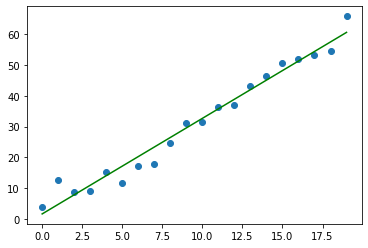

In [2]:
import matplotlib.pyplot as plt
import numpy as np


class LinearRegression:

    def __init__(self):
        self.W = None

    def fit(self, X, y):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.W = np.linalg.pinv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        y_predict = X @ self.W
        return y_predict


def create_data(N, W):
    X = np.arange(N).reshape((-1, 1))
    X_temp = np.hstack((np.ones((N, 1)), X))
    y = X_temp @ W + np.random.randn(N, 1) * 3
    return X, y


N = 20
W = np.array([[2], [3]])
X, y = create_data(N, W)

model = LinearRegression()
model.fit(X, y)
print('model.W:')
print(model.W)
y_predict = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_predict, color='g')